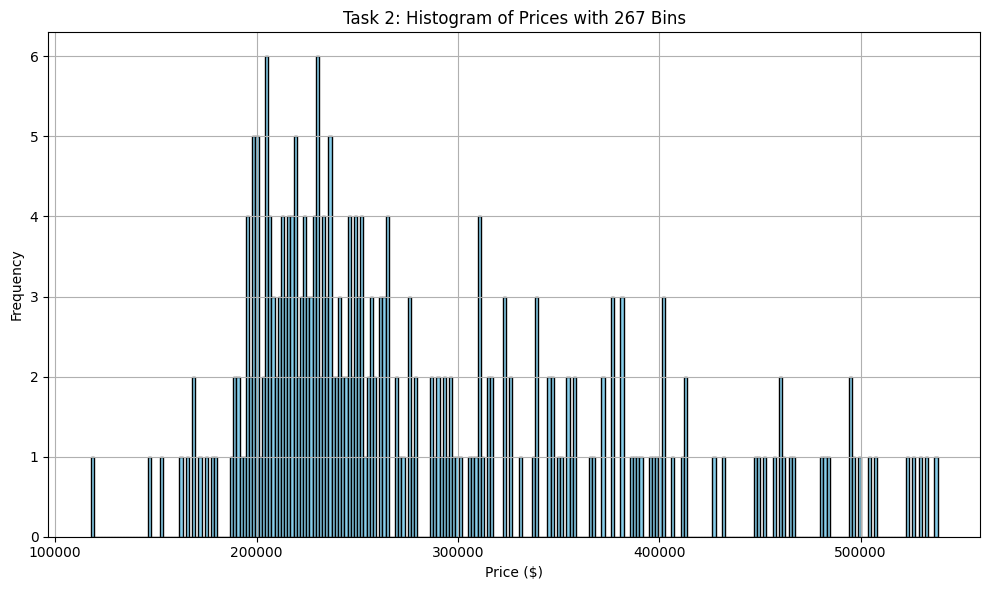

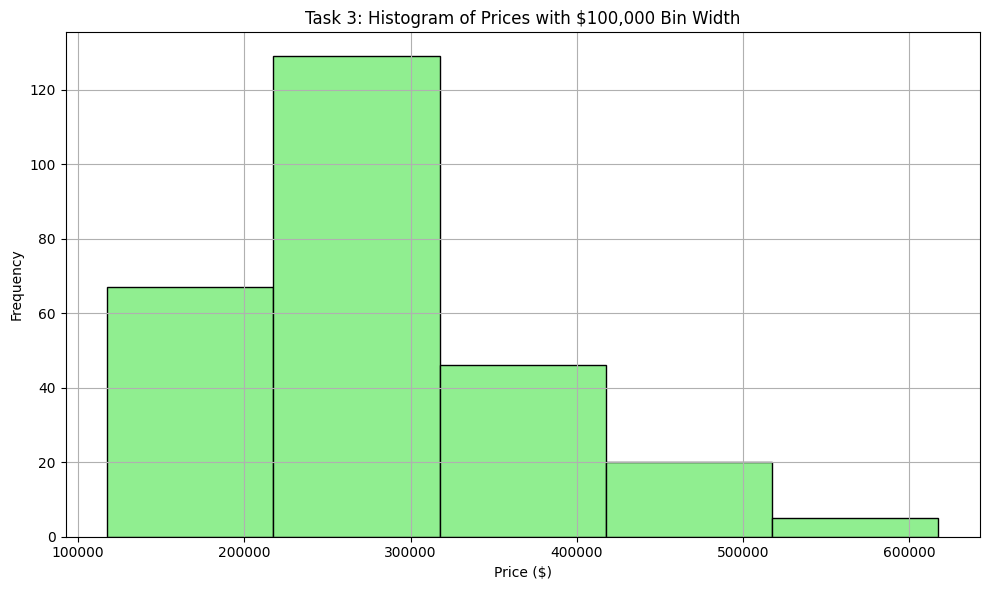

Task 4: Interpretation
count       267.000000
mean     281171.901501
std       89119.120849
min      117564.071600
25%      217553.056400
50%      249075.656800
75%      326964.852200
max      538271.735600
Name: Price, dtype: float64

Most properties seem to cluster in certain price ranges based on the histogram.
The $100,000-bin histogram helps visualize these groupings clearly.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"C:\Users\DELL\Desktop\Practical Example - Descriptive Statistics.xlsx"
df = pd.read_excel(file_path, sheet_name='365RE', skiprows=4)

# Drop rows where Price is missing
df = df[df['Price'].notna()]

# --- Task 2: Histogram with 267 bins ---
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=267, color='skyblue', edgecolor='black')
plt.title('Task 2: Histogram of Prices with 267 Bins')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Task 3: Histogram with $100,000 interval width ---
# Calculate range and bins
min_price = df['Price'].min()
max_price = df['Price'].max()
bin_edges = list(range(int(min_price), int(max_price) + 100000, 100000))

plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=bin_edges, color='lightgreen', edgecolor='black')
plt.title('Task 3: Histogram of Prices with $100,000 Bin Width')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Task 4: Interpretation ---
# (You can print this or adjust as needed)
price_description = df['Price'].describe()
print("Task 4: Interpretation")
print(price_description)
print("\nMost properties seem to cluster in certain price ranges based on the histogram.")
print("The $100,000-bin histogram helps visualize these groupings clearly.")


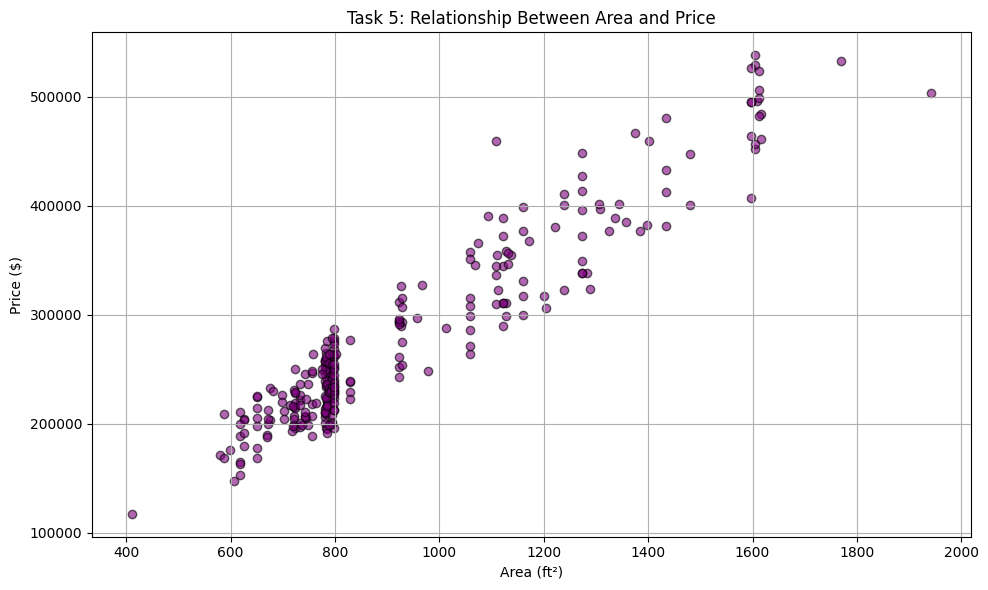

In [3]:
df = df[['Price', 'Area (ft.)']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(df['Area (ft.)'], df['Price'], alpha=0.6, color='purple', edgecolors='k')
plt.title('Task 5: Relationship Between Area and Price')
plt.xlabel('Area (ft²)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"C:\Users\DELL\Desktop\Practical Example - Descriptive Statistics.xlsx"
df = pd.read_excel(file_path, sheet_name='365RE', skiprows=4)
df.head()

,Unnamed: 0,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,NaN,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,NaN,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,NaN,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,NaN,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,NaN,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [9]:

# Drop rows where 'Country' is missing
df_country = df[df['Country'].notna()]

# Task 6: Frequency distribution for Country
country_counts = df_country['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Absolute Frequency']
country_counts['Relative Frequency (%)'] = (country_counts['Absolute Frequency'] / country_counts['Absolute Frequency'].sum()) * 100
country_counts['Cumulative Frequency (%)'] = country_counts['Relative Frequency (%)'].cumsum()

# Display the table
print(country_counts)



   Country  Absolute Frequency  Relative Frequency (%)  \
0      USA                 165               84.615385   
1     USA                   12                6.153846   
2   Canada                   7                3.589744   
3   Russia                   4                2.051282   
4       UK                   2                1.025641   
5  Belgium                   2                1.025641   
6  Denmark                   1                0.512821   
7  Germany                   1                0.512821   
8   Mexico                   1                0.512821   

   Cumulative Frequency (%)  
0                 84.615385  
1                 90.769231  
2                 94.358974  
3                 96.410256  
4                 97.435897  
5                 98.461538  
6                 98.974359  
7                 99.487179  
8                100.000000  


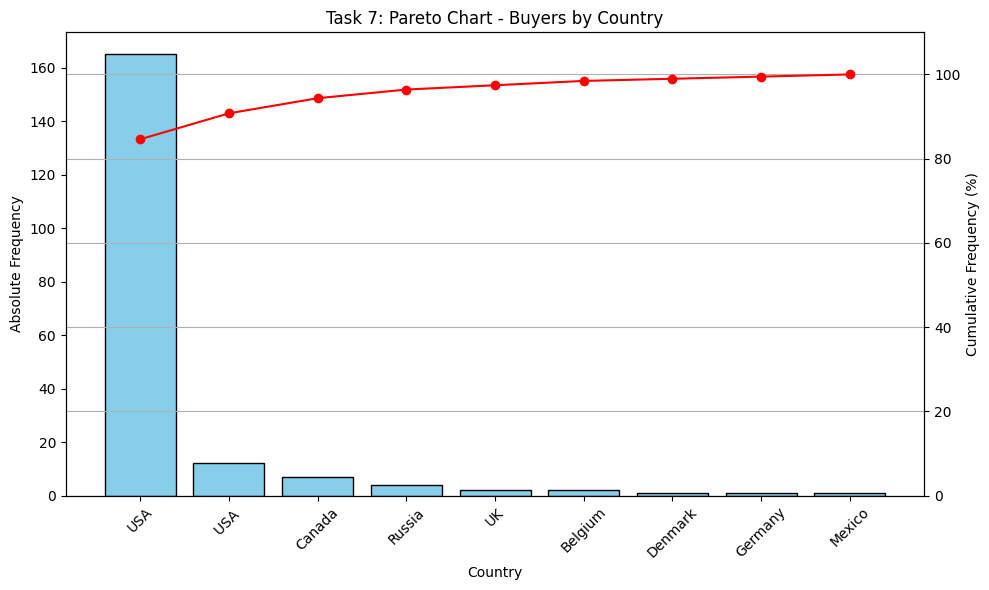

In [8]:
import matplotlib.pyplot as plt

# Sort by frequency for Pareto
sorted_data = country_counts.sort_values(by='Absolute Frequency', ascending=False)

# Bar chart for absolute frequency
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(sorted_data['Country'], sorted_data['Absolute Frequency'], color='skyblue', edgecolor='black')
ax1.set_ylabel('Absolute Frequency')
ax1.set_xlabel('Country')
ax1.set_title('Task 7: Pareto Chart - Buyers by Country')
ax1.tick_params(axis='x', rotation=45)

# Line plot for cumulative frequency on a secondary axis
ax2 = ax1.twinx()
ax2.plot(sorted_data['Country'], sorted_data['Cumulative Frequency (%)'], color='red', marker='o')
ax2.set_ylabel('Cumulative Frequency (%)')
ax2.set_ylim(0, 110)

plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from scipy.stats import skew, mode

import pandas as pd
from scipy.stats import skew, mode

# Load data
file_path = "Practical Example - Descriptive Statistics.xlsx"
df = pd.read_excel(file_path, sheet_name='365RE', skiprows=4)

# Drop rows with missing Price
prices = df['Price'].dropna()

# Descriptive statistics
mean_price = prices.mean()
median_price = prices.median()
mode_price = prices.mode()[0] if not prices.mode().empty else None
skewness_price = skew(prices)
variance_price = prices.var()
std_dev_price = prices.std()

# Display results
print(f"Mean: {mean_price:,.2f}")
print(f"Median: {median_price:,.2f}")
print(f"Mode: {mode_price:,.2f}")
print(f"Skewness: {skewness_price:.2f}")
print(f"Variance: {variance_price:,.2f}")
print(f"Standard Deviation: {std_dev_price:,.2f}")


# Drop rows with missing Price
prices = df['Price'].dropna()

# Descriptive statistics
mean_price = prices.mean()
median_price = prices.median()
mode_price = prices.mode()[0] if not prices.mode().empty else None
skewness_price = skew(prices)
variance_price = prices.var()
std_dev_price = prices.std()

# Display results
print(f"Mean: {mean_price:,.2f}")
print(f"Median: {median_price:,.2f}")
print(f"Mode: {mode_price:,.2f}")
print(f"Skewness: {skewness_price:.2f}")
print(f"Variance: {variance_price:,.2f}")
print(f"Standard Deviation: {std_dev_price:,.2f}")
import pandas as pd
from scipy.stats import skew, mode



# Drop rows with missing Price
prices = df['Price'].dropna()

# Descriptive statistics
mean_price = prices.mean()
median_price = prices.median()
mode_price = prices.mode()[0] if not prices.mode().empty else None
skewness_price = skew(prices)
variance_price = prices.var()
std_dev_price = prices.std()

# Display results
print(f"Mean: {mean_price:,.2f}")
print(f"Median: {median_price:,.2f}")
print(f"Mode: {mode_price:,.2f}")
print(f"Skewness: {skewness_price:.2f}")
print(f"Variance: {variance_price:,.2f}")
print(f"Standard Deviation: {std_dev_price:,.2f}")


Mean: 281,171.90
Median: 249,075.66
Mode: 460,001.26
Skewness: 1.09
Variance: 7,942,217,700.92
Standard Deviation: 89,119.12
Mean: 281,171.90
Median: 249,075.66
Mode: 460,001.26
Skewness: 1.09
Variance: 7,942,217,700.92
Standard Deviation: 89,119.12
Mean: 281,171.90
Median: 249,075.66
Mode: 460,001.26
Skewness: 1.09
Variance: 7,942,217,700.92
Standard Deviation: 89,119.12


In [12]:
import pandas as pd

# Load data
file_path = "Practical Example - Descriptive Statistics.xlsx"
df = pd.read_excel(file_path, sheet_name='365RE', skiprows=4)

# Drop rows with missing Price or Area
df_clean = df[['Price', 'Area (ft.)']].dropna()

# Covariance
covariance = df_clean.cov().loc['Price', 'Area (ft.)']

# Correlation coefficient
correlation = df_clean.corr().loc['Price', 'Area (ft.)']

# Display results
print(f"Covariance: {covariance:,.2f}")
print(f"Correlation Coefficient: {correlation:.4f}")


Covariance: 24,147,721.73
Correlation Coefficient: 0.9511
